<a href="https://colab.research.google.com/github/kkyung0131/Euron-6th-Project/blob/%EC%A1%B0%EC%8A%B9%EC%97%B0/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기 + 기타 전처리

In [1]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 20.8 MB/s eta 0:00:00


In [75]:
from google.colab import drive
drive.mount('/content/gdrive/')


file_path =  "/content/gdrive/My Drive/EuronData/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from konlpy.tag import Okt, Komoran, Hannanum, Kkma, Mecab
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import re

In [4]:
import pandas as pd

df = pd.read_csv(file_path + "preprocessed_review_data.csv")
df.head()

,category,reviews,keyword1,keyword2,keyword3
0,해산물요리,노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛...,음식이 맛있어요,친절해요,인테리어가 멋져요
1,고기요리,지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...,음식이 맛있어요,고기 질이 좋아요,친절해요
2,중식당,협력사들과 회의 끝내고 오찬 같이했네요 간만에 오니 새로운 메뉴도 생기고 사람이 많...,음식이 맛있어요,인테리어가 멋져요,특별한 메뉴가 있어요
3,고기요리,이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다 우연...,음식이 맛있어요,양이 많아요,친절해요
4,한식,생방송투데이와 맛의 승부사에도 방영될 정도로 검증된 유명한 핫플매장이더라구요 테라스...,음식이 맛있어요,양이 많아요,재료가 신선해요


In [5]:
#원핫 인코딩
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

#라벨 인코딩
le = LabelEncoder()
df['keyword1'] = le.fit_transform(df['keyword1'])
le = LabelEncoder()
df['keyword2'] = le.fit_transform(df['keyword2'])
le = LabelEncoder()
df['keyword3'] = le.fit_transform(df['keyword3'])

In [6]:
#stopwords 지정
#일단 인터넷에 있는거 하나 쓰긴 했는데 오히려 너무 많이 불용어로 처리하는거 아닌가 싶기도 하네요
#출처: https://ahnsun98.tistory.com/35#google_vignette
#예를 들어서 ~않다 라고 하면 부정의 의미니까 오히려 필요한 게 아닌지... 그런 친구들때문에 고민됩니다.
f = open(file_path + 'stopword.txt', "r")
stopwords = f.read().splitlines()

In [7]:
df['reviews'][0]

'노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛이깊이가있어서 볶음밥까지너무맛나네요퐁듀치즈에찍어먹었는데 천상의맛이네요 양도푸짐해서남은것들도 따로포장해서 사장님이챙겨주셨는데요 진짜 맛난거먹이고픈 엄마마음느꼈네용 감사드려요 쭈꾸미가 너무 먹고싶어서 온 신촌 역시 기대를 저버리지 않고 핵존맛 입니다 점심특선으로 먹었는데 가격 착하고 쭈꾸미 좋아하는 우리 여친느님께요 대만족을 하셨습니다 또한 볶음밥 하트로 해주시는데 너무 맛있고 좋아요 술도 싼데 점심이라 패스 진짜 좋아요ㅋㅋ 다음에 또올께요 집근천데 처음가봄 쭈삼 기본셋팅 홍합 콘치즈 계란까지 알차게 맛있어요 쭈꾸미삼겹 먹었는데 무난무난 맛있어요 볶음밥이 별미입니다ㅎ 계란찜두 보들거려서 맛있게 먹렀더니 직원분이 리필해쥬셨어요 처음 생겼을때부터 다녔으니까 아마 15년은 되었나봐요 이렇게 오랫동안 맛집을 유지하는건 역시나 맛이 있어서 그렇겠지요 가게 인테리어도 옛날 감성으로 정감있고 멋있어요 직원분들도 친절하고 여전히 쭈꾸미 맛있어요 국물이 마법 소스 같은데 국물 너무 얼큰하고 매콤하고 계속 끌리는 마성의 맛 요즘은 물가가 올라서 예전에는 날치알을 주셨는데 지금은 마요네즈를 주신다고 날치알도 맛있었지만 쭈꾸미가 매콤하니 마요네즈 소스를 날치알 대신 얹어 먹어도 매운맛이 중화 되어서 괜찮더라구요 반찬같은 경우는 셀프바가 있어서 직원들 안불러도 편하게 리필해서 먹을 수 있어서 그게 더 좋은것 같아요 계속 갈꺼니까 계속 장사해주세요 이번에도 잘 먹고 갑니다 ^^ 쭈꾸미가 탱글탱글하고 양도 많고 구성도 알찼어요 적당히 매콤해서 맵찔이도 맛있게 먹을 수 있었습니다 볶음밥에는 치즈랑 계란을 같이 넣고 볶아주시는데 이게 별미네요 사장님께서도 정말 친절하십니다 쭈꾸미도 크고 싱싱하고 양도 많아요 달걀찜도 무한리필이고 야채 셀프바도 있어서 푸짐하고 맛있어요 가게 컨셉이 60년대 감성이어서 타임머신타고 과거로 간것 같고 재미있어요 12년 이상 신촌맛집으로 생방송에도 방송되었어요 강추합니다 맛 있어요 추

In [10]:
def clean_text(text):
    # 자음/모음만 있는 패턴 제거
    text = re.sub(r'[ㄱ-ㅎㅏ-ㅣ]+', '', text)
    # 특수기호 제거 (한글, 영어, 숫자를 제외한 모든 문자 제거)
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text)
    # 연속된 공백을 하나의 공백으로
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['reviews'] = df['reviews'].apply(clean_text)

In [11]:
df['reviews'][0]

'노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛이깊이가있어서 볶음밥까지너무맛나네요퐁듀치즈에찍어먹었는데 천상의맛이네요 양도푸짐해서남은것들도 따로포장해서 사장님이챙겨주셨는데요 진짜 맛난거먹이고픈 엄마마음느꼈네용 감사드려요 쭈꾸미가 너무 먹고싶어서 온 신촌 역시 기대를 저버리지 않고 핵존맛 입니다 점심특선으로 먹었는데 가격 착하고 쭈꾸미 좋아하는 우리 여친느님께요 대만족을 하셨습니다 또한 볶음밥 하트로 해주시는데 너무 맛있고 좋아요 술도 싼데 점심이라 패스 진짜 좋아요 다음에 또올께요 집근천데 처음가봄 쭈삼 기본셋팅 홍합 콘치즈 계란까지 알차게 맛있어요 쭈꾸미삼겹 먹었는데 무난무난 맛있어요 볶음밥이 별미입니다 계란찜두 보들거려서 맛있게 먹렀더니 직원분이 리필해쥬셨어요 처음 생겼을때부터 다녔으니까 아마 15년은 되었나봐요 이렇게 오랫동안 맛집을 유지하는건 역시나 맛이 있어서 그렇겠지요 가게 인테리어도 옛날 감성으로 정감있고 멋있어요 직원분들도 친절하고 여전히 쭈꾸미 맛있어요 국물이 마법 소스 같은데 국물 너무 얼큰하고 매콤하고 계속 끌리는 마성의 맛 요즘은 물가가 올라서 예전에는 날치알을 주셨는데 지금은 마요네즈를 주신다고 날치알도 맛있었지만 쭈꾸미가 매콤하니 마요네즈 소스를 날치알 대신 얹어 먹어도 매운맛이 중화 되어서 괜찮더라구요 반찬같은 경우는 셀프바가 있어서 직원들 안불러도 편하게 리필해서 먹을 수 있어서 그게 더 좋은것 같아요 계속 갈꺼니까 계속 장사해주세요 이번에도 잘 먹고 갑니다 쭈꾸미가 탱글탱글하고 양도 많고 구성도 알찼어요 적당히 매콤해서 맵찔이도 맛있게 먹을 수 있었습니다 볶음밥에는 치즈랑 계란을 같이 넣고 볶아주시는데 이게 별미네요 사장님께서도 정말 친절하십니다 쭈꾸미도 크고 싱싱하고 양도 많아요 달걀찜도 무한리필이고 야채 셀프바도 있어서 푸짐하고 맛있어요 가게 컨셉이 60년대 감성이어서 타임머신타고 과거로 간것 같고 재미있어요 12년 이상 신촌맛집으로 생방송에도 방송되었어요 강추합니다 맛 있어요 추가 반찬도 

tag 지정 위해서 가장 첫번째 리뷰만 가져다가 토큰화 결과 살펴봤습니다!

In [15]:
#Okt, Komoran, Hannanum, Kkma, Mecab
okt = Okt()
komoran = Komoran()
hannanum = Hannanum()
kkma = Kkma()

print("Result of Twitter", okt.morphs(df['reviews'][0], stem=True))
print("Result of Komoran", komoran.morphs(df['reviews'][0]))
print("Result of Hannanum", hannanum.morphs(df['reviews'][0]))
print("Result of Kkma", kkma.morphs(df['reviews'][0]))

Result of Twitter ['노포', '식당', '요즘', '인기', '있다', '곳', '이래서', '오다', '주꾸미', '삼겹', '꽃게', '새우', '사리', '추가', '하다', '먹다', '양념', '맛', '이', '깊다', '볶음밥', '까지', '너무', '맛', '나', '네', '요', '퐁듀', '치즈', '에', '찍다', '먹다', '천', '상의', '맛', '이네', '요', '양도', '푸다', '지다', '서남', '은', '것', '들', '도', '따로', '포장', '하다', '사장', '님', '이', '챙기다', '진짜', '맛', '난', '거', '먹이', '고프다', '엄마', '마음', '느끼다', '네', '용', '감사', '드리다', '쭈꾸미', '가', '너무', '먹다', '온', '신촌', '역시', '기대', '를', '저', '버리다', '않다', '핵존맛', '이다', '점심', '특선', '으로', '먹다', '가격', '착하다', '쭈꾸미', '좋아하다', '우리', '여친', '느님', '께', '요', '대', '만족', '을', '하다', '또한', '볶음밥', '하트', '로', '해주다', '너무', '맛있다', '좋다', '술', '도', '싸다', '점심', '이라', '패스', '진짜', '좋다', '다음', '에', '또', '오다', '집', '근', '천', '데', '처음', '가보다', '쭈삼', '기본', '셋팅', '홍합', '콘치', '즈', '계란', '까지', '알차다', '맛있다', '쭈꾸미', '삼겹', '먹다', '무난', '무난', '맛있다', '볶음밥', '이', '별미', '이다', '계란찜', '두', '보', '들다', '려', '서', '맛있다', '먹렀더', '니', '직원', '분', '이', '리', '피다', '쥬셨', '어', '요', '처음', '생기다', '때', '부터', '다니다', '아마', '15년', '은', '되어

결과적으로 Okt가 가장 잘된 것 같아서 Okt 사용  

Hannanum의 경우 띄어쓰기가 없으면 잘 작동하지 않는 것으로 보임  
Komoran도 위와 비슷..

In [17]:
from collections import Counter
import operator

all_reviews = ' '.join(df['reviews'])

tokens = okt.morphs(all_reviews, stem = True)

stopword_counts = Counter(token for token in tokens if token in stopwords)
print(stopword_counts)

Counter({'하다': 5623, '이': 5283, '에': 3970, '가': 3082, '있다': 2587, '이다': 1502, '을': 1223, '같다': 1208, '로': 1160, '으로': 1120, '들': 1104, '를': 1032, '의': 921, '에서': 842, '것': 827, '않다': 756, '과': 701, '또': 664, '되다': 645, '때': 635, '와': 589, '시키다': 550, '까지': 529, '나': 472, '여기': 433, '다음': 424, '다른': 404, '제': 398, '저': 371, '하나': 345, '같이': 333, '시간': 326, '그리고': 316, '그': 298, '좀': 289, '되어다': 278, '부터': 229, '조금': 212, '바로': 207, '딱': 204, '하': 188, '함께': 162, '오': 158, '모두': 156, '구': 151, '아': 145, '일': 143, '네': 142, '이렇다': 139, '혼자': 128, '이번': 112, '등': 109, '아이': 109, '무엇': 105, '여': 100, '왜': 91, '일단': 90, '놀라다': 88, '저희': 86, '모': 82, '약간': 81, '그래도': 79, '이상': 78, '거의': 78, '야': 72, '둘': 68, '다만': 66, '어떻다': 64, '몇': 62, '에게': 61, '지만': 59, '너': 58, '사': 56, '하지만': 56, '매번': 56, '매일': 55, '어': 53, '전부': 52, '이지만': 47, '언제': 45, '이어서': 42, '그래서': 41, '육': 40, '타다': 39, '동안': 38, '매': 37, '심지어': 33, '각': 33, '그런데': 33, '훨씬': 32, '어디': 32, '자': 32, '예': 31, '우리': 28, '물론': 27, '

In [27]:
print(len(stopwords))
print(list(stopword_counts.most_common())[:100])

684
[('하다', 5623), ('이', 5283), ('에', 3970), ('가', 3082), ('있다', 2587), ('이다', 1502), ('을', 1223), ('같다', 1208), ('로', 1160), ('으로', 1120), ('들', 1104), ('를', 1032), ('의', 921), ('에서', 842), ('것', 827), ('않다', 756), ('과', 701), ('또', 664), ('되다', 645), ('때', 635), ('와', 589), ('시키다', 550), ('까지', 529), ('나', 472), ('여기', 433), ('다음', 424), ('다른', 404), ('제', 398), ('저', 371), ('하나', 345), ('같이', 333), ('시간', 326), ('그리고', 316), ('그', 298), ('좀', 289), ('되어다', 278), ('부터', 229), ('조금', 212), ('바로', 207), ('딱', 204), ('하', 188), ('함께', 162), ('오', 158), ('모두', 156), ('구', 151), ('아', 145), ('일', 143), ('네', 142), ('이렇다', 139), ('혼자', 128), ('이번', 112), ('등', 109), ('아이', 109), ('무엇', 105), ('여', 100), ('왜', 91), ('일단', 90), ('놀라다', 88), ('저희', 86), ('모', 82), ('약간', 81), ('그래도', 79), ('이상', 78), ('거의', 78), ('야', 72), ('둘', 68), ('다만', 66), ('어떻다', 64), ('몇', 62), ('에게', 61), ('지만', 59), ('너', 58), ('사', 56), ('하지만', 56), ('매번', 56), ('매일', 55), ('어', 53), ('전부', 52), ('이지만', 47), ('언제',

In [30]:
list(stopword_counts.most_common())[:100]

new_stopwords = []
for tup in list(stopword_counts.most_common())[:100]:
  new_stopwords.append(tup[0])

new_stopwords

['하다',
 '이',
 '에',
 '가',
 '있다',
 '이다',
 '을',
 '같다',
 '로',
 '으로',
 '들',
 '를',
 '의',
 '에서',
 '것',
 '않다',
 '과',
 '또',
 '되다',
 '때',
 '와',
 '시키다',
 '까지',
 '나',
 '여기',
 '다음',
 '다른',
 '제',
 '저',
 '하나',
 '같이',
 '시간',
 '그리고',
 '그',
 '좀',
 '되어다',
 '부터',
 '조금',
 '바로',
 '딱',
 '하',
 '함께',
 '오',
 '모두',
 '구',
 '아',
 '일',
 '네',
 '이렇다',
 '혼자',
 '이번',
 '등',
 '아이',
 '무엇',
 '여',
 '왜',
 '일단',
 '놀라다',
 '저희',
 '모',
 '약간',
 '그래도',
 '이상',
 '거의',
 '야',
 '둘',
 '다만',
 '어떻다',
 '몇',
 '에게',
 '지만',
 '너',
 '사',
 '하지만',
 '매번',
 '매일',
 '어',
 '전부',
 '이지만',
 '언제',
 '이어서',
 '그래서',
 '육',
 '타다',
 '동안',
 '매',
 '심지어',
 '각',
 '그런데',
 '훨씬',
 '어디',
 '자',
 '예',
 '우리',
 '물론',
 '이런',
 '우선',
 '어느',
 '누구',
 '영']

In [32]:
print(len(new_stopwords))

100


기존 불용어 리스트에서 가장 자주 나온 단어 100개를 기준으로 만들었습니다.

In [36]:
#형태소 뽑기 + 불용어 제거 함수
def find_morphs(df):
  #(Okt 이용)
  okt = Okt()
  X = []
  for sentence in tqdm(df):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    #stopword 제거
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in new_stopwords]
    X.append(stopwords_removed_sentence)

  return X

In [37]:
df['processed_review'] = find_morphs(df['reviews'])

100%|██████████| 670/670 [02:17<00:00,  4.88it/s]


텍스트가 그렇게 큰 편이 아니라서 1번만 나온 단어들만 제거했습니다!

In [ ]:
for sentence in df.iloc[0:5, 1]:
  print(sentence)

In [ ]:
df['processed_review'][0]

['노포',
 '식당',
 '요즘',
 '인기',
 '있는',
 '곳',
 '이래서',
 '왔어요',
 '주꾸미',
 '삼겹',
 '꽃게',
 '새우',
 '사리',
 '추가',
 '해서',
 '먹었는데요',
 '양념',
 '맛',
 '깊이가있어서',
 '볶음밥',
 '너무',
 '맛',
 '요',
 '퐁듀',
 '치즈',
 '찍어',
 '먹었는데',
 '천',
 '상의',
 '맛',
 '이네',
 '요',
 '양도',
 '푸',
 '짐해',
 '서남',
 '은',
 '도',
 '따로',
 '포장',
 '해서',
 '사장',
 '님',
 '챙겨주셨는데요',
 '진짜',
 '맛',
 '난',
 '거',
 '먹이',
 '고픈',
 '엄마',
 '마음',
 '느꼈',
 '용',
 '감사',
 '드려요',
 '쭈꾸미',
 '너무',
 '먹고싶어서',
 '온',
 '신촌',
 '역시',
 '기대',
 '버리지',
 '않고',
 '핵존맛',
 '입니다',
 '점심',
 '특선',
 '먹었는데',
 '가격',
 '착하고',
 '쭈꾸미',
 '좋아하는',
 '여친',
 '느님',
 '께',
 '요',
 '대',
 '만족',
 '하셨습니다',
 '볶음밥',
 '하트',
 '해주시는데',
 '너무',
 '맛있고',
 '좋아요',
 '술',
 '도',
 '싼데',
 '점심',
 '이라',
 '패스',
 '진짜',
 '좋아요',
 'ㅋㅋ',
 '올께요',
 '집',
 '근',
 '천',
 '데',
 '처음',
 '가봄',
 '쭈삼',
 '기본',
 '셋팅',
 '홍합',
 '콘치',
 '즈',
 '계란',
 '알차게',
 '맛있어요',
 '쭈꾸미',
 '삼겹',
 '먹었는데',
 '무난',
 '무난',
 '맛있어요',
 '볶음밥',
 '별미',
 '입니다',
 'ㅎ',
 '계란찜',
 '두',
 '보',
 '들거',
 '려',
 '서',
 '맛있게',
 '먹렀더',
 '니',
 '직원',
 '분',
 '리',
 '필해',
 '쥬셨',
 '요',
 '처음',
 '생겼을',
 '다녔으

# Tokenizer 적용

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_review'])

In [39]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10884
등장 빈도가 1번 이하인 희귀 단어의 수: 4541
단어 집합에서 희귀 단어의 비율: 41.721793458287394
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.4838910829349405


In [40]:
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 6344


In [41]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(df['processed_review'])
df['review_enc'] = tokenizer.texts_to_sequences(df['processed_review'])

리뷰의 최대 길이 : 686
리뷰의 평균 길이 : 266.08507462686566


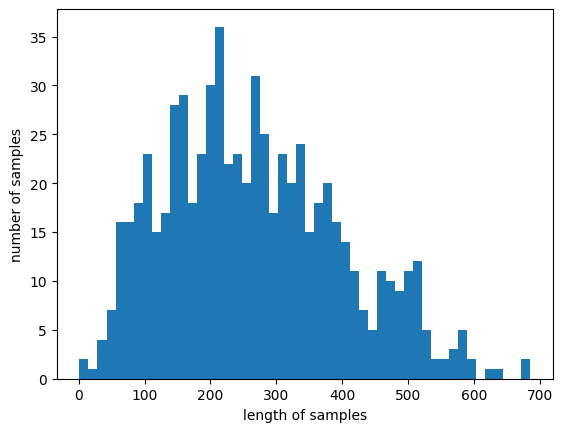

In [42]:
#리뷰 길이 히스토그램
print('리뷰의 최대 길이 :',max(len(review) for review in df['review_enc']))
print('리뷰의 평균 길이 :',sum(map(len, df['review_enc']))/len(df['review_enc']))
plt.hist([len(review) for review in df['review_enc']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [43]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [44]:
max_len = 700
below_threshold_len(max_len, df['review_enc'])

전체 샘플 중 길이가 700 이하인 샘플의 비율: 100.0


In [45]:
max_len = 600
below_threshold_len(max_len, df['review_enc'])

전체 샘플 중 길이가 600 이하인 샘플의 비율: 99.40298507462687


In [46]:
max_len = 500
below_threshold_len(max_len, df['review_enc'])

전체 샘플 중 길이가 500 이하인 샘플의 비율: 94.17910447761194


max_len = 600으로 잡는 게 가장 이상적일 것으로 보임!

In [47]:
max_len = 600
padded_sequences = pad_sequences(df['review_enc'], maxlen=max_len)

In [ ]:
#X_train_text, X_test_text, X_train_cat, X_test_cat, y_train, y_test = train_test_split(padded_sequences, df['category_encoded'], df['keyword2'], test_size=0.2, random_state=0)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['keyword2'], test_size = 0.2, random_state = 0)

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test, pred))

0.22388059701492538


In [50]:
from sklearn.metrics import confusion_matrix

<Axes: >

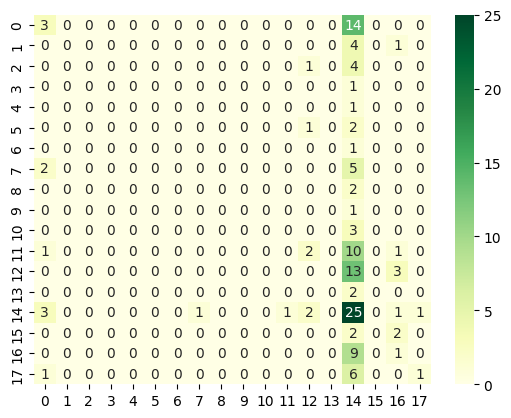

In [53]:
#오차 행렬 시각화
cm = confusion_matrix(y_test, pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

역시나 밥이 맛있어요로 많이 들어가는 것 같네요

# TF-IDF 적용

TF-IDF 벡터화, Word2Vec 벡터화

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [89]:
# TF-IDF 사용
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  #1개짜리랑 bigram
    stop_words = new_stopwords,  #불용어 지정
    max_df=0.95,  #95% 이상의 문서에 등장하는 단어 무시
    min_df=2,  #2개 이상의 문서에 등장하는 단어만 사용
)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['reviews'])

print("TF-IDF Matrix:\n", tfidf_matrix.toarray())


TF-IDF Matrix:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06833829 0.         ... 0.         0.         0.        ]]


벡터화 결과 rf로 정확도 측정

In [90]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['keyword2'], test_size = 0.2, random_state = 0)

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test, pred))

0.2835820895522388


<Axes: >

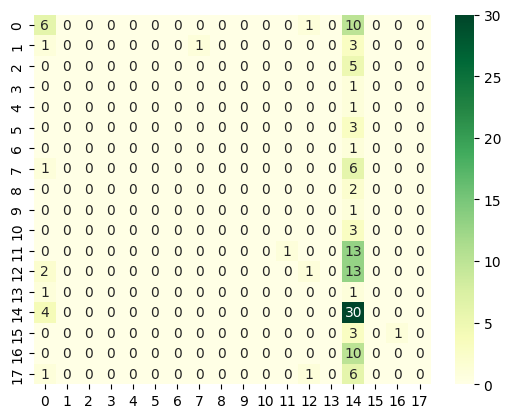

In [92]:
#오차 행렬 시각화
cm = confusion_matrix(y_test, pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

# Word2Vec 적용

In [67]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [68]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

#토큰화
tokenized_reviews = [word_tokenize(review) for review in df['reviews']]

#Word2Vec
model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

#리뷰 벡터화
def get_average_vector(review):
    vectors = [model.wv[word] for word in review if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X = np.array([get_average_vector(review) for review in tokenized_reviews])
X_train, X_test, y_train, y_test = train_test_split(X, df['keyword2'], test_size=0.2, random_state=42)

# RandomForestClassifier 모델 학습
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.23880597014925373


<Axes: >

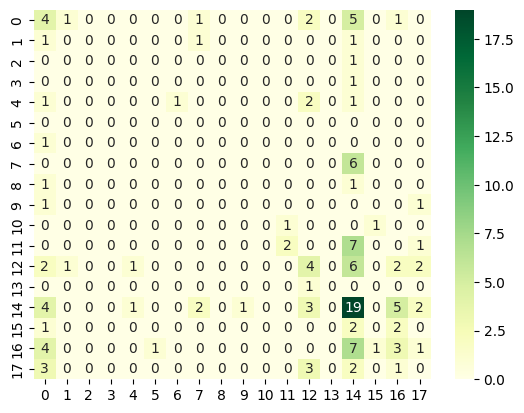

In [69]:
#오차 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

# FastText 적용

In [70]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize

#토큰화
tokenized_reviews = [word_tokenize(review) for review in df['reviews']]

#FastText 모델
model = FastText(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

#리뷰 벡터화 위의 Word2Vec과 같이 사용
def get_average_vector(review):
    vectors = [model.wv[word] for word in review if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X = np.array([get_average_vector(review) for review in tokenized_reviews])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, df['keyword2'], test_size=0.2, random_state=42)

# RandomForestClassifier 모델 학습 및 평가
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('FastText Accuracy:', accuracy_score(y_test, y_pred))


FastText Accuracy: 0.1791044776119403


<Axes: >

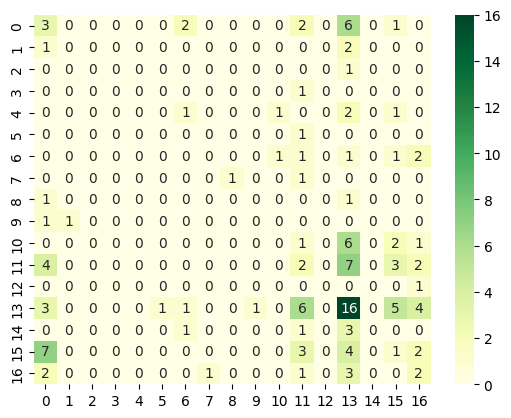

In [71]:
#오차 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

# KoBert 적용

In [72]:
import torch
from transformers import BertTokenizer, BertModel

# KoBERT 모델 및 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('monologg/kobert')
model = BertModel.from_pretrained('monologg/kobert')

# 리뷰 벡터화
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy().squeeze()

X = np.array([get_bert_embedding(review) for review in df['reviews']])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, df['keyword2'], test_size=0.2, random_state=42)

# RandomForestClassifier 모델 학습 및 평가
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('KoBERT Accuracy:', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/426 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

KoBERT Accuracy: 0.29850746268656714


<Axes: >

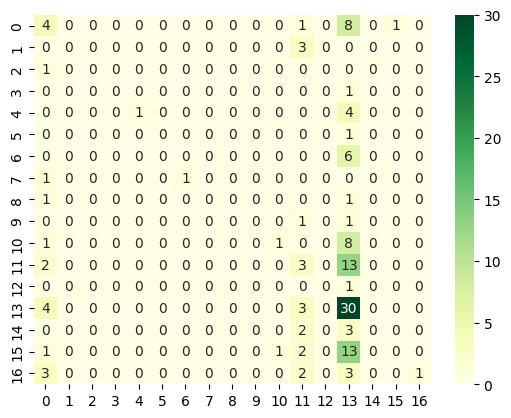

In [73]:
#오차 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

# Data Augmentation

In [76]:
import random
import pickle
import re

wordnet = {}
with open(file_path + "wordnet.pickle", "rb") as f:
	wordnet = pickle.load(f)


# 한글만 남기고 나머지는 삭제
def get_only_hangul(line):
	parseText= re.compile('/ ^[ㄱ-ㅎㅏ-ㅣ가-힣]*$/').sub('',line)

	return parseText



########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################
def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			num_replaced += 1
		if num_replaced >= n:
			break

	if len(new_words) != 0:
		sentence = ' '.join(new_words)
		new_words = sentence.split(" ")

	else:
		new_words = ""

	return new_words


def get_synonyms(word):
	synomyms = []

	try:
		for syn in wordnet[word]:
			for s in syn:
				synomyms.append(s)
	except:
		pass

	return synomyms

########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################
def random_deletion(words, p):
	if len(words) == 1:
		return words

	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################
def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

########################################################################
# Random insertion
# Randomly insert n words into the sentence
########################################################################
def random_insertion(words, n):
	new_words = words.copy()
	for _ in range(n):
		add_word(new_words)

	return new_words


def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		if len(new_words) >= 1:
			random_word = new_words[random.randint(0, len(new_words)-1)]
			synonyms = get_synonyms(random_word)
			counter += 1
		else:
			random_word = ""

		if counter >= 10:
			return

	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)



def EDA(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=9):
	sentence = get_only_hangul(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not ""]
	num_words = len(words)

	augmented_sentences = []
	num_new_per_technique = int(num_aug/4) + 1

	n_sr = max(1, int(alpha_sr*num_words))
	n_ri = max(1, int(alpha_ri*num_words))
	n_rs = max(1, int(alpha_rs*num_words))

	# sr
	for _ in range(num_new_per_technique):
		a_words = synonym_replacement(words, n_sr)
		augmented_sentences.append(' '.join(a_words))

	# ri
	for _ in range(num_new_per_technique):
		a_words = random_insertion(words, n_ri)
		augmented_sentences.append(' '.join(a_words))

	# rs
	for _ in range(num_new_per_technique):
		a_words = random_swap(words, n_rs)
		augmented_sentences.append(" ".join(a_words))

	# rd
	for _ in range(num_new_per_technique):
		a_words = random_deletion(words, p_rd)
		augmented_sentences.append(" ".join(a_words))

	augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]
	random.shuffle(augmented_sentences)

	if num_aug >= 1:
		augmented_sentences = augmented_sentences[:num_aug]
	else:
		keep_prob = num_aug / len(augmented_sentences)
		augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

	augmented_sentences.append(sentence)

	return augmented_sentences

<>:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-76-681232a2069f>:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not ""]


In [84]:
def expand_dataframe_with_augmentation(df):
    new_rows = []
    for index, row in df.iterrows():
        augmented_reviews = EDA(row['reviews'])
        for aug_review in augmented_reviews:
            new_row = row.copy()
            new_row['reviews'] = aug_review
            new_rows.append(new_row)

    # 새로운 행을 데이터프레임에 추가
    augmented_df = pd.DataFrame(new_rows)
    return pd.concat([df, augmented_df], ignore_index=True)

# 데이터프레임 확장
expanded_df = expand_dataframe_with_augmentation(df)

In [85]:
expanded_df.tail()

,category,reviews,keyword1,keyword2,keyword3,category_encoded,processed_review,review_enc
7365,주점,바로 집앞이라 자주 가는 술집이에요 납작만두 야채 완전 새콤하네요 만두가 15장이나...,6,19,29,4,"[집앞, 이라, 자주, 가다, 술집, 이에요, 납작만두, 야채, 완전, 새, 콤, ...","[1434, 58, 67, 14, 313, 46, 4804, 252, 80, 510..."
7366,주점,바로 집앞이라 불 가는 술집이에요 납작만두 야채 완전 새콤하네요 만두가 15장이나 ...,6,19,29,4,"[집앞, 이라, 자주, 가다, 술집, 이에요, 납작만두, 야채, 완전, 새, 콤, ...","[1434, 58, 67, 14, 313, 46, 4804, 252, 80, 510..."
7367,주점,바로 집앞이라 자주 가는 술집이에요 납작만두 야채 완전 새콤하네요 만두가 15장이나...,6,19,29,4,"[집앞, 이라, 자주, 가다, 술집, 이에요, 납작만두, 야채, 완전, 새, 콤, ...","[1434, 58, 67, 14, 313, 46, 4804, 252, 80, 510..."
7368,주점,바로 집앞이라 자주 가는 술집이에요 납작만두 야채 완전 새콤하네요 만두가 15장이나...,6,19,29,4,"[집앞, 이라, 자주, 가다, 술집, 이에요, 납작만두, 야채, 완전, 새, 콤, ...","[1434, 58, 67, 14, 313, 46, 4804, 252, 80, 510..."
7369,주점,바로 집앞이라 자주 가는 술집이에요 납작만두 야채 완전 새콤하네요 만두가 15장이나...,6,19,29,4,"[집앞, 이라, 자주, 가다, 술집, 이에요, 납작만두, 야채, 완전, 새, 콤, ...","[1434, 58, 67, 14, 313, 46, 4804, 252, 80, 510..."


In [86]:
expanded_df.head()

,category,reviews,keyword1,keyword2,keyword3,category_encoded,processed_review,review_enc
0,해산물요리,노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛...,6,19,20,10,"[노포, 식당, 요즘, 인기, 곳, 이래서, 오다, 주꾸미, 삼겹, 꽃게, 새우, ...","[1322, 194, 287, 712, 19, 4805, 9, 928, 1647, ..."
1,고기요리,지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...,6,1,26,0,"[지나가다, 너무, 예쁘다, 술집, 인, 줄, 알다, 알, 고, 보, 니까, 신촌,...","[550, 5, 120, 313, 60, 309, 140, 211, 43, 530,..."
2,중식당,협력사들과 회의 끝내고 오찬 같이했네요 간만에 오니 새로운 메뉴도 생기고 사람이 많...,6,14,29,5,"[협력, 회의, 끝내다, 오찬, 간만, 오니, 새롭다, 메뉴, 도, 생기, 고, 사...","[4818, 3968, 3001, 1104, 2691, 274, 27, 1, 269..."
3,고기요리,이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다 우연히...,6,10,26,0,"[리뷰, 는, 업체, 로부터, 무료, 이용권, 제공, 받다, 대가, 작성, 한, 솔...","[161, 8, 2249, 3006, 654, 571, 124, 1501, 1176..."
4,한식,생방송투데이와 맛의 승부사에도 방영될 정도로 검증된 유명한 핫플매장이더라구요 테라스...,6,10,21,9,"[생방송투데이, 맛, 승부사, 에도, 방영, 정도, 검증, 유명하다, 핫, 플, 매...","[6, 129, 3972, 91, 3412, 310, 1105, 1040, 45, ..."


In [87]:
expanded_df.shape

(7370, 8)

# TF-IDF 적용

In [93]:
# TF-IDF 사용
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  #1개짜리랑 bigram
    stop_words=new_stopwords,  #불용어 지정
    max_df=0.95,  #95% 이상의 문서에 등장하는 단어 무시
    min_df=2,  #2개 이상의 문서에 등장하는 단어만 사용
)
tfidf_matrix = tfidf_vectorizer.fit_transform(expanded_df['reviews'])
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())


TF-IDF Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [94]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, expanded_df['keyword2'], test_size = 0.2, random_state = 0)

In [95]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test, pred))

1.0


<Axes: >

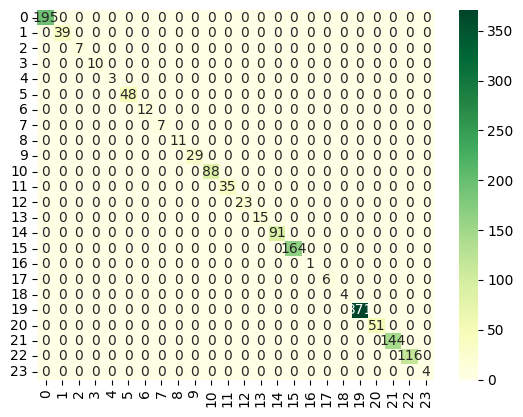

In [96]:
#오차 행렬 시각화
cm = confusion_matrix(y_test, pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

이거 뭔가 제가 단단히 잘못한 것 같은데 혹시 뭔가 오류점 발견하시면 꼭 말씀해주세요... 😢😢😢

# Word2Vec 적용

In [97]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

#토큰화
tokenized_reviews = [word_tokenize(review) for review in expanded_df['reviews']]

#Word2Vec
model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

#리뷰 벡터화
def get_average_vector(review):
    vectors = [model.wv[word] for word in review if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X = np.array([get_average_vector(review) for review in tokenized_reviews])
X_train, X_test, y_train, y_test = train_test_split(X, expanded_df['keyword2'], test_size=0.2, random_state=42)

# RandomForestClassifier 모델 학습
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9993215739484396


<Axes: >

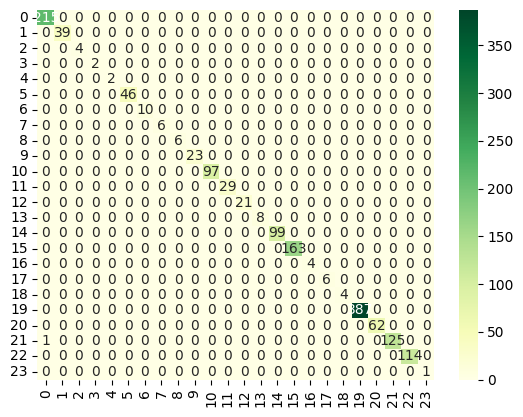

In [98]:
#오차 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

# FastText 적용

In [100]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize

#토큰화
tokenized_reviews = [word_tokenize(review) for review in expanded_df['reviews']]

#FastText 모델
model = FastText(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

#리뷰 벡터화 위의 Word2Vec과 같이 사용
def get_average_vector(review):
    vectors = [model.wv[word] for word in review if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X = np.array([get_average_vector(review) for review in tokenized_reviews])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, expanded_df['keyword2'], test_size=0.2, random_state=42)

# RandomForestClassifier 모델 학습 및 평가
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('FastText Accuracy:', accuracy_score(y_test, y_pred))


FastText Accuracy: 0.9993215739484396


<Axes: >

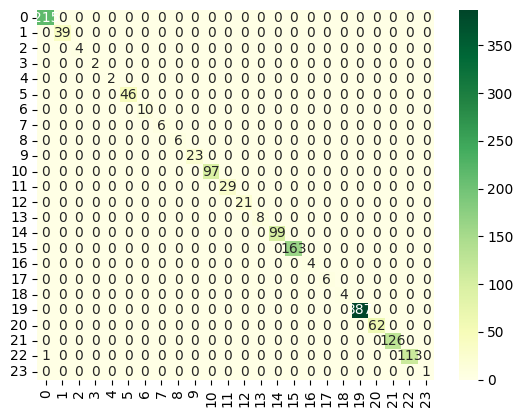

In [101]:
#오차 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')